In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from bs4 import BeautifulSoup # HTTP Response -> HTML 
import re
import nltk
import matplotlib
import json
import folium

%matplotlib inline
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) 

In [2]:
df1 = pd.read_csv('과거_판매가격(주유소)2019111-2020045.csv', encoding='euc-kr') 
df2 = pd.read_csv('과거_판매가격(주유소)2020051-2020104.csv', encoding='euc-kr') 
df = pd.concat([df1, df2]) #df1 df2를 위아래로 붙입니다
df = df.dropna() #기준 : 주간(20191103~20200502)이라고 쓰여 있는 행을 제거합니다
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
1,A0020701,광주 광산구,(유)모우리주유소,광주 광산구 소촌로 68 (소촌동),2019년 11월 1주,현대오일뱅크,셀프,0.00,1493.00,1343.00,0.0
2,A0020701,광주 광산구,(유)모우리주유소,광주 광산구 소촌로 68 (소촌동),2019년 11월 2주,현대오일뱅크,셀프,0.00,1493.00,1343.00,0.0
3,A0020701,광주 광산구,(유)모우리주유소,광주 광산구 소촌로 68 (소촌동),2019년 11월 3주,현대오일뱅크,셀프,0.00,1493.00,1331.57,0.0
4,A0020701,광주 광산구,(유)모우리주유소,광주 광산구 소촌로 68 (소촌동),2019년 11월 4주,현대오일뱅크,셀프,0.00,1501.57,1331.57,0.0
5,A0020701,광주 광산구,(유)모우리주유소,광주 광산구 소촌로 68 (소촌동),2019년 12월 1주,현대오일뱅크,셀프,0.00,1513.00,1343.00,0.0
6,A0020701,광주 광산구,(유)모우리주유소,광주 광산구 소촌로 68 (소촌동),2019년 12월 2주,현대오일뱅크,셀프,0.00,1513.00,1343.00,0.0
7,A0020701,광주 광산구,(유)모우리주유소,광주 광산구 소촌로 68 (소촌동),2019년 12월 3주,현대오일뱅크,셀프,0.00,1513.00,1343.00,0.0
8,A0020701,광주 광산구,(유)모우리주유소,광주 광산구 소촌로 68 (소촌동),2019년 12월 4주,현대오일뱅크,셀프,0.00,1521.57,1347.29,0.0
9,A0020701,광주 광산구,(유)모우리주유소,광주 광산구 소촌로 68 (소촌동),2020년 01월 1주,현대오일뱅크,셀프,0.00,1533.00,1353.00,0.0
10,A0020701,광주 광산구,(유)모우리주유소,광주 광산구 소촌로 68 (소촌동),2020년 01월 2주,현대오일뱅크,셀프,0.00,1533.00,1353.00,0.0


In [3]:
df['주소(동)']=df['주소'].apply(lambda x : x.replace('광역시', '')) #광주'광역시'라고 되어 있는 주유소가 몇몇 있어 sort시 순서가 뒤섞이므로, 모든 주소에서 '광역시'를 빼 줍니다. 
df = df.sort_values(by=['주소(동)', '기간']) #먼저 새로 만든 '주소(동)' 열 기준으로 sort하고, 차순으로 기간 기준으로 sort합니다. 
df = df.reset_index(drop=True) #인덱스가 뒤섞였으므로 reset하고 원래 인덱스는 drop합니다. 
df = df[['번호', '상호', '주소(동)', '기간', '휘발유']] #필요한 열만 뽑아 간단하게 만듭니다. 
df.rename(columns = {'주소(동)':'주소'}, inplace=True) #새로 만든 주소 열을 원래 주소 열로 집어넣습니다. 
df

,번호,상호,주소,기간,휘발유
0,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 1주,1527.00
1,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 2주,1527.00
2,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 3주,1527.00
3,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 4주,1527.00
4,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 1주,1535.57
5,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 2주,1537.00
6,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 3주,1537.00
7,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 4주,1537.00
8,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2020년 01월 1주,1559.86
9,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2020년 01월 2주,1577.00


In [4]:
df['동'] = df.주소.str.split('(').str[1].str[:-1] #후에 동마다의 평균으로 시각화를 하기 위해, 주소에서 동을 따로 떼어냅니다. 
df

,번호,상호,주소,기간,휘발유,동
0,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 1주,1527.00,월전동
1,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 2주,1527.00,월전동
2,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 3주,1527.00,월전동
3,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 4주,1527.00,월전동
4,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 1주,1535.57,월전동
5,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 2주,1537.00,월전동
6,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 3주,1537.00,월전동
7,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 4주,1537.00,월전동
8,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2020년 01월 1주,1559.86,월전동
9,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2020년 01월 2주,1577.00,월전동


In [5]:
num = df['번호'].value_counts() #데이터가 총 52주치가 아닌 주유소들을 발견했습니다. 모든 주유소마다 번호가 있으므로 한 주유소마다의 행 개수를 셉니다 .
num

A0019752    55
A0020041    53
A0020603    53
A0020600    53
A0020416    53
A0019705    53
A0020561    53
A0033372    53
A0020427    53
A0019953    53
A0019989    53
A0020599    53
A0022332    53
A0020076    53
A0020541    53
A0033066    53
A0020123    53
A0019660    53
A0020073    53
A0019688    53
A0020044    53
A0019959    52
A0020591    52
A0020084    52
A0019768    52
A0020446    52
A0020259    52
A0020185    52
A0019699    52
A0019411    52
            ..
A0020081    52
A0020455    52
A0020129    52
A0019462    52
A0020376    52
A0019437    52
A0020478    51
A0020605    51
A0020465    51
A0020165    50
A0019669    50
A0020040    50
A0020481    49
A0020705    48
A0020470    48
A0019593    48
A0020488    47
A0020238    44
A0019803    44
A0020277    44
A0020071    41
A0020650    41
A0020677    38
A0020160    38
A0033444    36
A0019871    35
A0029884    29
A0021180    27
A0019810    25
A0033492     7
Name: 번호, Length: 278, dtype: int64

In [6]:
del_num = num[num.values != 52] #이 중 총 52주치가 아닌 주유소들을 골라냅니다. 
del_num

A0019752    55
A0020041    53
A0020603    53
A0020600    53
A0020416    53
A0019705    53
A0020561    53
A0033372    53
A0020427    53
A0019953    53
A0019989    53
A0020599    53
A0022332    53
A0020076    53
A0020541    53
A0033066    53
A0020123    53
A0019660    53
A0020073    53
A0019688    53
A0020044    53
A0020478    51
A0020605    51
A0020465    51
A0020165    50
A0019669    50
A0020040    50
A0020481    49
A0020705    48
A0020470    48
A0019593    48
A0020488    47
A0020238    44
A0019803    44
A0020277    44
A0020071    41
A0020650    41
A0020677    38
A0020160    38
A0033444    36
A0019871    35
A0029884    29
A0021180    27
A0019810    25
A0033492     7
Name: 번호, dtype: int64

In [7]:
numbers = del_num.index #주유소 번호 부분이 index이고 번호마다의 행 갯수가 value이므로, 해당하는 주유소를 찾기 위해 index를 떼어냅니다. 
numbers

Index(['A0019752', 'A0020041', 'A0020603', 'A0020600', 'A0020416', 'A0019705',
       'A0020561', 'A0033372', 'A0020427', 'A0019953', 'A0019989', 'A0020599',
       'A0022332', 'A0020076', 'A0020541', 'A0033066', 'A0020123', 'A0019660',
       'A0020073', 'A0019688', 'A0020044', 'A0020478', 'A0020605', 'A0020465',
       'A0020165', 'A0019669', 'A0020040', 'A0020481', 'A0020705', 'A0020470',
       'A0019593', 'A0020488', 'A0020238', 'A0019803', 'A0020277', 'A0020071',
       'A0020650', 'A0020677', 'A0020160', 'A0033444', 'A0019871', 'A0029884',
       'A0021180', 'A0019810', 'A0033492'],
      dtype='object')

In [8]:
print(df[df['번호'].isin(numbers)]) #52주가 아닌 주유소가 포함된 행을 골라냅니다. 

             번호                    상호                    주소            기간  \
832    A0021180                 씨티주유소  광주 광산구 동곡로 350 (복룡동)  2019년 11월 1주   
833    A0021180                 씨티주유소  광주 광산구 동곡로 350 (복룡동)  2019년 11월 2주   
834    A0021180                 씨티주유소  광주 광산구 동곡로 350 (복룡동)  2019년 11월 3주   
835    A0021180                 씨티주유소  광주 광산구 동곡로 350 (복룡동)  2019년 11월 4주   
836    A0021180                 씨티주유소  광주 광산구 동곡로 350 (복룡동)  2019년 12월 1주   
837    A0021180                 씨티주유소  광주 광산구 동곡로 350 (복룡동)  2019년 12월 2주   
838    A0021180                 씨티주유소  광주 광산구 동곡로 350 (복룡동)  2019년 12월 3주   
839    A0021180                 씨티주유소  광주 광산구 동곡로 350 (복룡동)  2019년 12월 4주   
840    A0021180                 씨티주유소  광주 광산구 동곡로 350 (복룡동)  2020년 01월 1주   
841    A0021180                 씨티주유소  광주 광산구 동곡로 350 (복룡동)  2020년 01월 2주   
842    A0021180                 씨티주유소  광주 광산구 동곡로 350 (복룡동)  2020년 01월 3주   
843    A0021180                 씨티주유소  광주 광산구 동곡로 350 (복룡동)  2020년 01월 4주   

In [9]:
del_Index = df[df['번호'].isin(numbers)].index.tolist() #52주가 아닌 주유소들의 행의 인덱스를 골라냅니다. 
del_Index

[832,
 833,
 834,
 835,
 836,
 837,
 838,
 839,
 840,
 841,
 842,
 843,
 844,
 845,
 846,
 847,
 848,
 849,
 850,
 851,
 852,
 853,
 854,
 855,
 856,
 857,
 858,
 1067,
 1068,
 1069,
 1070,
 1071,
 1072,
 1073,
 1074,
 1075,
 1076,
 1077,
 1078,
 1079,
 1080,
 1081,
 1082,
 1083,
 1084,
 1085,
 1086,
 1087,
 1088,
 1089,
 1090,
 1091,
 1092,
 1093,
 1094,
 1095,
 1096,
 1097,
 1098,
 1099,
 1100,
 1101,
 1102,
 1103,
 1104,
 1105,
 1106,
 1107,
 1108,
 1109,
 1110,
 1111,
 1112,
 1113,
 1114,
 1271,
 1272,
 1273,
 1274,
 1275,
 1276,
 1277,
 1278,
 1279,
 1280,
 1281,
 1282,
 1283,
 1284,
 1285,
 1286,
 1287,
 1288,
 1289,
 1290,
 1291,
 1292,
 1293,
 1294,
 1295,
 1296,
 1297,
 1298,
 1299,
 1300,
 1301,
 1302,
 1303,
 1304,
 1305,
 1306,
 1307,
 1308,
 1309,
 1310,
 1311,
 1312,
 1313,
 1314,
 1315,
 1316,
 1317,
 1318,
 1319,
 1320,
 1321,
 1322,
 1323,
 1376,
 1377,
 1378,
 1379,
 1380,
 1381,
 1382,
 1383,
 1384,
 1385,
 1386,
 1387,
 1388,
 1389,
 1390,
 1391,
 1392,
 1393,
 1394

In [10]:
df.drop(del_Index, inplace=True) #52주가 아닌 주유소들의 인덱스를 이용해 해당 주유소들을 제외시킵니다
df = df.reset_index(drop=True) # 인덱스 리셋
df

,번호,상호,주소,기간,휘발유,동
0,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 1주,1527.00,월전동
1,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 2주,1527.00,월전동
2,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 3주,1527.00,월전동
3,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 4주,1527.00,월전동
4,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 1주,1535.57,월전동
5,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 2주,1537.00,월전동
6,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 3주,1537.00,월전동
7,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 4주,1537.00,월전동
8,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2020년 01월 1주,1559.86,월전동
9,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2020년 01월 2주,1577.00,월전동


In [11]:
address = df['주소'][::52] #'동'이 나와 있지 않은 주유소가 많은 것을 발견했습니다. 크롤링으로 동을 찾기 위해 52행마다 하나씩 주소를 골라냅니다. 
print(address)

0           광주 광산구  동곡로 450 (월전동)
52       광주 광산구  북문대로 364-5 (신창동)
104                광주 광산구 건재로 761
156           광주 광산구 고봉로 21 (하남동)
208                광주 광산구 고봉로 238
260          광주 광산구 고봉로 239 (장수동)
312          광주 광산구 고봉로 249 (장수동)
364          광주 광산구 고봉로 541 (산막동)
416          광주 광산구 고봉로 565 (산막동)
468          광주 광산구 고봉로 785 (임곡동)
520          광주 광산구 고봉로 905 (광산동)
572        광주 광산구 금동학동길 315 (덕림동)
624        광주 광산구 노안삼도로 983 (삼도동)
676          광주 광산구 동곡로 104 (하산동)
728          광주 광산구 동곡로 171 (하산동)
780          광주 광산구 동곡로 259 (복룡동)
832                광주 광산구 동곡로 383
884          광주 광산구 동곡로 407 (월전동)
936          광주 광산구 동곡로 422 (월전동)
988           광주 광산구 동곡로 510(월전동)
1040         광주 광산구 동곡로 606 (장록동)
1092         광주 광산구 동곡로 645 (송촌동)
1144         광주 광산구 동곡로 655 (송촌동)
1196         광주 광산구 동곡로 664 (송촌동)
1248               광주 광산구 동곡로 839
1300         광주 광산구 동곡로 846 (운수동)
1352         광주 광산구 동곡로 852 (운수동)
1404         광주 광산구 목련로 216 (운남동)
1456         광주 광산구 목련로 225 (운남동)
1508          

In [12]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

from bs4 import BeautifulSoup 
import time
import pandas as pd

In [13]:
from selenium.webdriver.chrome.options import Options
options = Options()
options.binary_location = "C:\\Program Files\\Google\\Chrome\\Application\\chrome.exe"
driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe', chrome_options=options)
driver.get('https://search.naver.com/search.naver')
driver.current_url

'https://search.naver.com/search.naver'

In [14]:
dong_result = []
error_주소 = []
for 주소 in address:
    try:
        driver.find_element_by_id('nx_query').clear()
        driver.find_element_by_id('nx_query').send_keys(주소)
        driver.find_element_by_xpath('//*[@id="nx_search_form"]/fieldset/button/i').click()
        time.sleep(1)

        dong_contents = driver.find_element_by_class_name('_2G32t').text
        dong_result.append(dong_contents)

        print('주소 "{}"의 검색 완료 : {}'.format(주소, dong_contents))
        
    except:
        print('주소를 찾지 못했습니다. : {}'.format(주소))
        error_주소.append(주소)

driver.close()
driver.quit()

print('전체 검색이 끝났습니다!')
print(error_주소)

주소 "광주 광산구  동곡로 450 (월전동)"의 검색 완료 : 광주광역시 광산구 월전동 68-4
주소 "광주 광산구  북문대로 364-5 (신창동)"의 검색 완료 : 광주광역시 광산구 신창동 1083-8
주소 "광주 광산구 건재로 761"의 검색 완료 : 광주광역시 광산구 본덕동 617-6
주소를 찾지 못했습니다. : 광주 광산구 고봉로 21 (하남동)
주소 "광주 광산구 고봉로 238"의 검색 완료 : 광주광역시 광산구 장수동 467-2
주소 "광주 광산구 고봉로 239 (장수동)"의 검색 완료 : 광주광역시 광산구 장수동 457
주소 "광주 광산구 고봉로 249 (장수동)"의 검색 완료 : 광주광역시 광산구 장수동 446
주소 "광주 광산구 고봉로 541 (산막동)"의 검색 완료 : 광주광역시 광산구 산막동 456-2
주소 "광주 광산구 고봉로 565 (산막동)"의 검색 완료 : 광주광역시 광산구 산막동 469-2
주소 "광주 광산구 고봉로 785 (임곡동)"의 검색 완료 : 광주광역시 광산구 임곡동 494-2
주소 "광주 광산구 고봉로 905 (광산동)"의 검색 완료 : 광주광역시 광산구 광산동 666-7
주소 "광주 광산구 금동학동길 315 (덕림동)"의 검색 완료 : 광주광역시 광산구 덕림동 985-1
주소 "광주 광산구 노안삼도로 983 (삼도동)"의 검색 완료 : 광주광역시 광산구 삼도동 105
주소 "광주 광산구 동곡로 104 (하산동)"의 검색 완료 : 광주광역시 광산구 하산동 153-2
주소 "광주 광산구 동곡로 171 (하산동)"의 검색 완료 : 광주광역시 광산구 하산동 481-6
주소 "광주 광산구 동곡로 259 (복룡동)"의 검색 완료 : 광주광역시 광산구 복룡동 385
주소 "광주 광산구 동곡로 383"의 검색 완료 : 광주광역시 광산구 복룡동 89-5
주소 "광주 광산구 동곡로 407 (월전동)"의 검색 완료 : 광주광역시 광산구 월전동 274-1
주소 "광주 광산구 동곡로 422 (월전동)"의 검색 완료 : 광주광역시 광산구 월전

주소 "광주 북구 무등로 142 (신안동)"의 검색 완료 : 광주광역시 북구 신안동 257-2
주소 "광주 북구 무등로 165 (신안동)"의 검색 완료 : 광주광역시 북구 신안동 130-1
주소 "광주 북구 무등로 180 (신안동)"의 검색 완료 : 광주광역시 북구 신안동 134-4
주소 "광주 북구 무등로 213"의 검색 완료 : 광주광역시 북구 신안동 123-4
주소 "광주 북구 북문대로 190 (운암동)"의 검색 완료 : 광주광역시 북구 운암동 1081-5
주소 "광주 북구 북문대로 34 (운암동)"의 검색 완료 : 광주광역시 북구 운암동 486-11
주소 "광주 북구 빛고을대로 652 (용두동)"의 검색 완료 : 광주광역시 북구 용두동 1043-16
주소 "광주 북구 빛고을대로 825 (지야동)"의 검색 완료 : 광주광역시 북구 지야동 770-13
주소 "광주 북구 삼소로 191 (대촌동)"의 검색 완료 : 광주광역시 북구 대촌동 709-1
주소 "광주 북구 삼소로 318 (월출동)"의 검색 완료 : 광주광역시 북구 월출동 742-2
주소 "광주 북구 삼소로 330 (월출동)"의 검색 완료 : 광주광역시 북구 월출동 545-4
주소 "광주 북구 서암대로 128"의 검색 완료 : 광주광역시 북구 신안동 232-14
주소 "광주 북구 서암대로 323 (우산동)"의 검색 완료 : 광주광역시 북구 우산동 555-5
주소 "광주 북구 서하로 237 (오치동)"의 검색 완료 : 광주광역시 북구 오치동 956-10
주소 "광주 북구 서하로 468"의 검색 완료 : 광주광역시 북구 두암동 560-22
주소 "광주 북구 서하로 77 (매곡동)"의 검색 완료 : 광주광역시 북구 매곡동 367-3
주소 "광주 북구 서하로 86 (매곡동)"의 검색 완료 : 광주광역시 북구 매곡동 373-6
주소 "광주 북구 설죽로 183 (용봉동)"의 검색 완료 : 광주광역시 북구 용봉동 700-34
주소 "광주 북구 설죽로 398 (삼각동)"의 검색 완료 : 광주광역시 북구 삼각동 753

In [15]:
dong_result

['광주광역시 광산구 월전동 68-4',
 '광주광역시 광산구 신창동 1083-8',
 '광주광역시 광산구 본덕동 617-6',
 '광주광역시 광산구 장수동 467-2',
 '광주광역시 광산구 장수동 457',
 '광주광역시 광산구 장수동 446',
 '광주광역시 광산구 산막동 456-2',
 '광주광역시 광산구 산막동 469-2',
 '광주광역시 광산구 임곡동 494-2',
 '광주광역시 광산구 광산동 666-7',
 '광주광역시 광산구 덕림동 985-1',
 '광주광역시 광산구 삼도동 105',
 '광주광역시 광산구 하산동 153-2',
 '광주광역시 광산구 하산동 481-6',
 '광주광역시 광산구 복룡동 385',
 '광주광역시 광산구 복룡동 89-5',
 '광주광역시 광산구 월전동 274-1',
 '광주광역시 광산구 월전동 111-1',
 '광주광역시 광산구 월전동 2-75',
 '광주광역시 광산구 장록동 388',
 '광주광역시 광산구 송촌동 240-1',
 '광주광역시 광산구 송촌동 227-1',
 '광주광역시 광산구 송촌동 68',
 '광주광역시 광산구 운수동 257-2',
 '광주광역시 광산구 운수동 253-2',
 '광주광역시 광산구 운수동 251-6',
 '광주광역시 광산구 운남동 519-6',
 '광주광역시 광산구 운남동 520-1',
 '광주광역시 광산구 운남동 522-12',
 '광주광역시 광산구 신가동 593-6',
 '광주광역시 광산구 신가동 327-1',
 '광주광역시 광산구 소촌동 226-6',
 '광주광역시 광산구 소촌동 756-1',
 '광주광역시 광산구 소촌동 755-4',
 '광주광역시 광산구 신창동 79-70',
 '광주광역시 광산구 신창동 79-2',
 '광주광역시 광산구 신창동 1089-9',
 '광주광역시 광산구 신창동 1074-8',
 '광주광역시 광산구 신창동 1074-4',
 '광주광역시 광산구 수완동 37-1',
 '광주광역시 광산구 수완동 264',
 '광주광역시 광산구 비아동 9-87',
 '광주광역시 

In [16]:
dong_result.insert(3, '광주 광산구 하남동') #네이버에 '플레이스'로 나오지 않아 주소가 없던 한 곳에만 주소를 넣어줍니다. 
dong_result

['광주광역시 광산구 월전동 68-4',
 '광주광역시 광산구 신창동 1083-8',
 '광주광역시 광산구 본덕동 617-6',
 '광주 광산구 하남동',
 '광주광역시 광산구 장수동 467-2',
 '광주광역시 광산구 장수동 457',
 '광주광역시 광산구 장수동 446',
 '광주광역시 광산구 산막동 456-2',
 '광주광역시 광산구 산막동 469-2',
 '광주광역시 광산구 임곡동 494-2',
 '광주광역시 광산구 광산동 666-7',
 '광주광역시 광산구 덕림동 985-1',
 '광주광역시 광산구 삼도동 105',
 '광주광역시 광산구 하산동 153-2',
 '광주광역시 광산구 하산동 481-6',
 '광주광역시 광산구 복룡동 385',
 '광주광역시 광산구 복룡동 89-5',
 '광주광역시 광산구 월전동 274-1',
 '광주광역시 광산구 월전동 111-1',
 '광주광역시 광산구 월전동 2-75',
 '광주광역시 광산구 장록동 388',
 '광주광역시 광산구 송촌동 240-1',
 '광주광역시 광산구 송촌동 227-1',
 '광주광역시 광산구 송촌동 68',
 '광주광역시 광산구 운수동 257-2',
 '광주광역시 광산구 운수동 253-2',
 '광주광역시 광산구 운수동 251-6',
 '광주광역시 광산구 운남동 519-6',
 '광주광역시 광산구 운남동 520-1',
 '광주광역시 광산구 운남동 522-12',
 '광주광역시 광산구 신가동 593-6',
 '광주광역시 광산구 신가동 327-1',
 '광주광역시 광산구 소촌동 226-6',
 '광주광역시 광산구 소촌동 756-1',
 '광주광역시 광산구 소촌동 755-4',
 '광주광역시 광산구 신창동 79-70',
 '광주광역시 광산구 신창동 79-2',
 '광주광역시 광산구 신창동 1089-9',
 '광주광역시 광산구 신창동 1074-8',
 '광주광역시 광산구 신창동 1074-4',
 '광주광역시 광산구 수완동 37-1',
 '광주광역시 광산구 수완동 264',
 '광주광역시 광산구 비아동 

In [17]:
address = address.to_frame() #dataframe 형식으로 만들어줍니다. 
address['주소'] = dong_result
address

,주소
0,광주광역시 광산구 월전동 68-4
52,광주광역시 광산구 신창동 1083-8
104,광주광역시 광산구 본덕동 617-6
156,광주 광산구 하남동
208,광주광역시 광산구 장수동 467-2
260,광주광역시 광산구 장수동 457
312,광주광역시 광산구 장수동 446
364,광주광역시 광산구 산막동 456-2
416,광주광역시 광산구 산막동 469-2
468,광주광역시 광산구 임곡동 494-2


In [18]:
address['주소'] = address.주소.str.split().str[2] #공백 기준으로 나눠 세 번째 요소에 해당하는 동을 꺼냅니다. 
print(address)

        주소
0      월전동
52     신창동
104    본덕동
156    하남동
208    장수동
260    장수동
312    장수동
364    산막동
416    산막동
468    임곡동
520    광산동
572    덕림동
624    삼도동
676    하산동
728    하산동
780    복룡동
832    복룡동
884    월전동
936    월전동
988    월전동
1040   장록동
1092   송촌동
1144   송촌동
1196   송촌동
1248   운수동
1300   운수동
1352   운수동
1404   운남동
1456   운남동
1508   운남동
...    ...
10556  농성동
10608  벽진동
10660  마륵동
10712  마륵동
10764  마륵동
10816  쌍촌동
10868  농성동
10920  쌍촌동
10972  화정동
11024  농성동
11076  광천동
11128  치평동
11180  치평동
11232  치평동
11284  매월동
11336  매월동
11388  벽진동
11440  마륵동
11492  세하동
11544  매월동
11596  풍암동
11648  동천동
11700  화정동
11752  광천동
11804  쌍촌동
11856  서창동
11908  서창동
11960  매월동
12012  매월동
12064  매월동

[233 rows x 1 columns]


In [19]:
df['동'] = address #동을 df에 새로운 열로 넣습니다.
df

,번호,상호,주소,기간,휘발유,동
0,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 1주,1527.00,월전동
1,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 2주,1527.00,NaN
2,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 3주,1527.00,NaN
3,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 4주,1527.00,NaN
4,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 1주,1535.57,NaN
5,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 2주,1537.00,NaN
6,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 3주,1537.00,NaN
7,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 4주,1537.00,NaN
8,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2020년 01월 1주,1559.86,NaN
9,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2020년 01월 2주,1577.00,NaN


In [20]:
df.fillna(method='pad', inplace=True) #52주 중 첫 번째 행에만 동이 들어갔으므로, 위에 있는 데이터를 아래 결측치에 덮어씌워주는 pad 변수를 이용해 결측치를 채워줍니다. 
df

,번호,상호,주소,기간,휘발유,동
0,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 1주,1527.00,월전동
1,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 2주,1527.00,월전동
2,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 3주,1527.00,월전동
3,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 4주,1527.00,월전동
4,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 1주,1535.57,월전동
5,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 2주,1537.00,월전동
6,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 3주,1537.00,월전동
7,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 4주,1537.00,월전동
8,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2020년 01월 1주,1559.86,월전동
9,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2020년 01월 2주,1577.00,월전동


In [21]:
df.to_csv('과거_판매가격_1년 전체(주유소)2019111-2020104.csv', index=False, encoding='euc-kr') #파일로 저장합니다. 

In [22]:
df = pd.read_csv('과거_판매가격_1년 전체(주유소)2019111-2020104.csv', encoding='euc-kr') 
df

,번호,상호,주소,기간,휘발유,동
0,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 1주,1527.00,월전동
1,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 2주,1527.00,월전동
2,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 3주,1527.00,월전동
3,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 4주,1527.00,월전동
4,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 1주,1535.57,월전동
5,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 2주,1537.00,월전동
6,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 3주,1537.00,월전동
7,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 12월 4주,1537.00,월전동
8,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2020년 01월 1주,1559.86,월전동
9,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2020년 01월 2주,1577.00,월전동


In [23]:
guangjuWeekAverage_df = pd.pivot_table(df, index='기간') #주별 광주 전체 휘발유 평균값을 구합니다. 
guangjuWeekAverage_df

,휘발유
기간,
2019년 11월 1주,1511.429185
2019년 11월 2주,1511.739528
2019년 11월 3주,1513.800300
2019년 11월 4주,1516.493004
2019년 12월 1주,1520.410258
2019년 12월 2주,1525.781631
2019년 12월 3주,1531.618927
2019년 12월 4주,1538.661931
2020년 01월 1주,1544.928712


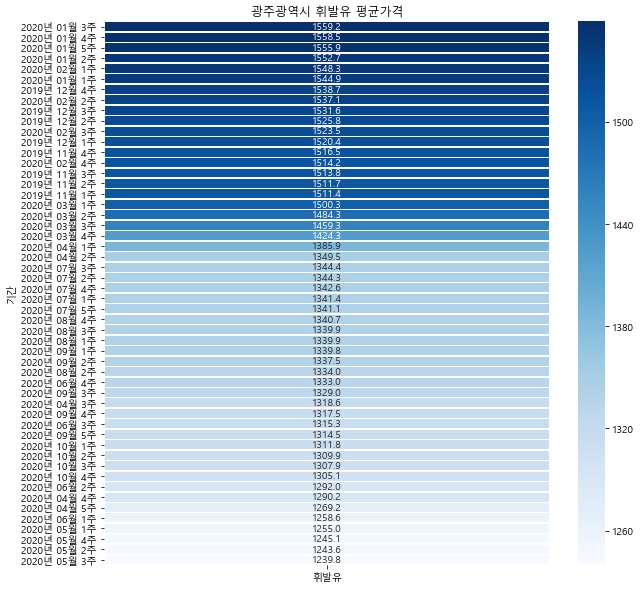

In [24]:
plt.figure(figsize = (10,10))

sns.heatmap(guangjuWeekAverage_df.sort_values(by='휘발유', ascending=False), 
            annot=True, fmt='.1f', linewidths=.5, cmap='Blues')
plt.title('광주광역시 휘발유 평균가격')
plt.show()

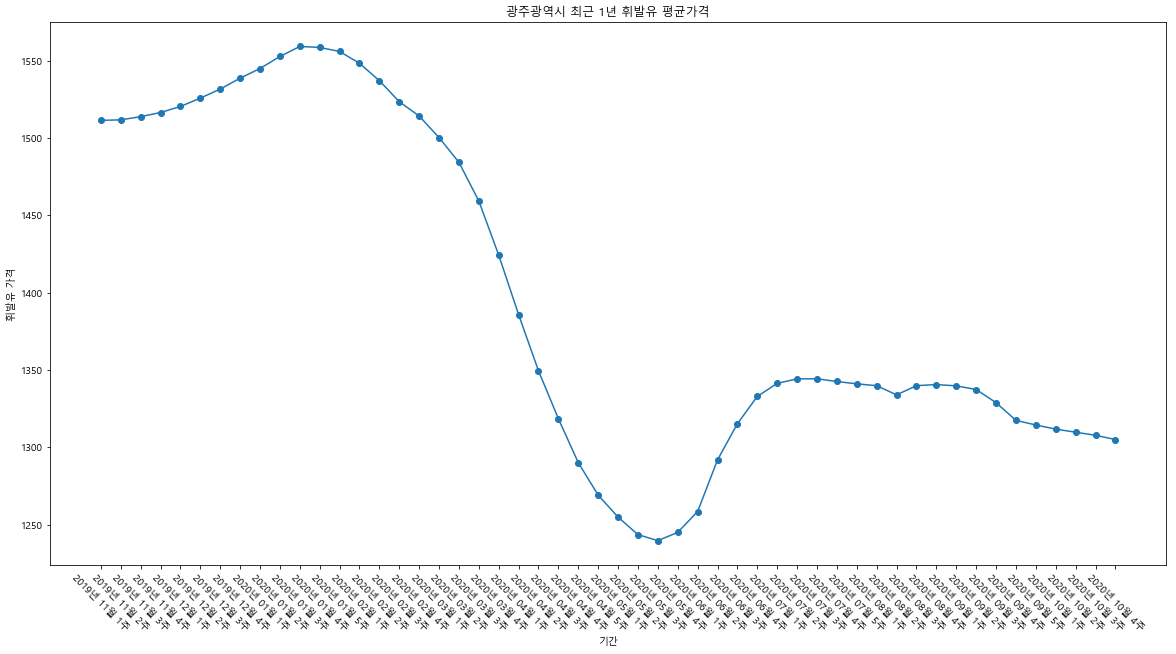

In [25]:
plt.figure(figsize = (20,10))
plt.plot('휘발유', data=guangjuWeekAverage_df, linestyle='-', marker='o')
plt.xticks(rotation = - 45 ) #x축 인덱스를 45도 회전시켜서 겹치지 않게 합니다. 
plt.title('광주광역시 최근 1년 휘발유 평균가격')
plt.xlabel('기간')
plt.ylabel('휘발유 가격')
plt.show()

In [26]:
dongWeekAverage_df = pd.pivot_table(df, index='동', columns='기간', values='휘발유') #각 동마다 기간별 휘발유 평균값을 구합니다. 
dongWeekAverage_df

기간,2019년 11월 1주,2019년 11월 2주,2019년 11월 3주,2019년 11월 4주,2019년 12월 1주,2019년 12월 2주,2019년 12월 3주,2019년 12월 4주,2020년 01월 1주,2020년 01월 2주,...,2020년 08월 4주,2020년 09월 1주,2020년 09월 2주,2020년 09월 3주,2020년 09월 4주,2020년 09월 5주,2020년 10월 1주,2020년 10월 2주,2020년 10월 3주,2020년 10월 4주
동,,,,,,,,,,,,,,,,,,,,,
각화동,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1579.000000,1584.000000,1584.000000,1591.855000,1594.000000,...,1403.500000,1403.500000,1403.500000,1394.930000,1388.500000,1388.500000,1388.500000,1388.500000,1388.500000,1388.500000
광산동,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1530.430000,1539.000000,1539.000000,1559.000000,1561.860000,...,1359.000000,1359.000000,1359.000000,1359.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
광천동,1531.430000,1540.000000,1535.715000,1530.000000,1530.715000,1535.000000,1535.000000,1540.000000,1554.285000,1561.000000,...,1350.000000,1343.145000,1342.000000,1340.570000,1332.000000,1333.430000,1329.645000,1313.645000,1311.500000,1306.855000
내남동,1559.000000,1559.000000,1559.000000,1559.000000,1516.140000,1520.430000,1539.000000,1544.710000,1564.710000,1579.000000,...,1349.000000,1349.000000,1349.000000,1342.140000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000
농성동,1486.333333,1492.713333,1494.333333,1495.286667,1498.713333,1509.286667,1517.380000,1524.046667,1538.330000,1541.000000,...,1323.000000,1323.000000,1320.620000,1313.953333,1313.000000,1301.000000,1289.000000,1289.000000,1288.046667,1284.903333
대촌동,1498.000000,1498.000000,1498.000000,1499.430000,1498.000000,1509.430000,1518.000000,1534.670000,1538.000000,1542.290000,...,1318.000000,1318.000000,1318.000000,1300.860000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1289.430000
덕림동,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1568.570000,...,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1412.860000,1430.000000
도덕동,1499.000000,1499.000000,1510.430000,1519.000000,1527.570000,1529.000000,1529.000000,1527.570000,1533.290000,1539.000000,...,1329.000000,1329.000000,1316.140000,1306.140000,1297.570000,1290.290000,1286.140000,1279.000000,1279.000000,1279.000000
도산동,1489.000000,1489.000000,1499.000000,1499.000000,1507.570000,1509.000000,1519.000000,1519.000000,1527.570000,1540.430000,...,1329.000000,1329.000000,1327.570000,1316.140000,1299.000000,1299.000000,1294.710000,1289.000000,1289.000000,1289.000000


In [27]:
def view_map(df, year, month, week): #함수 정의
    term = year+'년 '+month+'월 '+week+'주'
    
    geo_path = 'Gwangju EMD_20201110.geojson'
    geo_str = json.load( open(geo_path, encoding='utf-8') )
    map = folium.Map(location=[35.161642, 126.837226], zoom_start=11, tiles='Stamen Toner')

    print('시각화 기간은 "{}" 입니다.'.format(term))
    
    try:
        df[term]
    except:
        print('기간이 존재하지 않습니다. 해당 월에 입력하신 주가 있는지 확인해주세요.')  
        return None
        
    map.choropleth(geo_data = geo_str, 

                   data = df[term],
                   columns = [df.index, df[term]], 

                   fill_color = 'PuRd', 
                   key_on = 'properties.A2')
    return map

In [28]:
year = input('년을 입력해주세요. (2019 또는 2020)')
month = input('월을 입력해주세요. (ex. 09)')
week = input('주를 입력해주세요. (ex. 1)')

if len(month) != 2:
    print('월은 반드시 2글자로 입력해주세요. 다시 실행해주세요!')
else:
    if year != '2019' and year != '2020':
        year = str('2020')
        print('년은 2019 또는 2020으로만 입력하실 수 있습니다. 2020년으로 시각화를 진행합니다. ')
    if int(month) > 12 or int(month) < 1:
        month = str('01')
        print('월은 1부터 12까지만 입력하실 수 있습니다. 1월로 시각화를 진행합니다. ')
    if int(week) > 5 or int(week) < 1:
        week = str('1')
        print('주는 1부터 5까지만 입력하실 수 있습니다. 1주로 시각화를 진행합니다. ')
    map_result = view_map(dongWeekAverage_df, year, month, week)
map_result

년을 입력해주세요. (2019 또는 2020)2020
월을 입력해주세요. (ex. 09)05
주를 입력해주세요. (ex. 1)1
시각화 기간은 "2020년 05월 1주" 입니다.


In [71]:
df.to_csv('과거_판매가격_1년 전체(주유소)2019111-2020104.csv', index=False, encoding='euc-kr') #파일로 저장합니다. 

In [84]:
df=df.sort_values(by='기간' ,ascending=True)
df

,번호,상호,주소,기간,휘발유,동
0,A0020305,동일주유소,광주 광산구 동곡로 450 (월전동),2019년 11월 1주,1527.00,월전동
2912,A0019469,(주)명당주유소,광주 광산구 사암로 865 (도천동),2019년 11월 1주,1504.00,도천동
11700,A0020376,광주화정셀프주유소,광주 서구 화운로 180 (화정동),2019년 11월 1주,1499.00,화정동
9100,A0021111,일신주유소,광주 북구 설죽로 645 (일곡동),2019년 11월 1주,1549.00,일곡동
10764,A0020680,운천주유소,광주 서구 상무대로 758,2019년 11월 1주,1485.00,마륵동
2860,A0020550,현대오일뱅크(주) 비아도천주유소,광주 광산구 사암로 841 (도천동),2019년 11월 1주,1517.00,도천동
6916,A0033410,주남셀프주유소,광주 동구 남문로 352,2019년 11월 1주,1493.29,월남동
9152,A0019476,지산주유소,광주 북구 양산택지로 157,2019년 11월 1주,1519.00,본촌동
5044,A0020190,한백석유첨단주유소(SK),광주 광산구 첨단과기로 53 (비아동),2019년 11월 1주,1589.00,비아동
4992,A0020544,금성2주유소,광주 광산구 첨단과기로 33 (비아동),2019년 11월 1주,1518.00,비아동


In [85]:
df3 = pd.pivot_table(df, index='동', columns = '기간', values = '휘발유', aggfunc = 'mean')
df3 # df3 == 기간별로 나눈 각 동의 휘발유 평균값

기간,2019년 11월 1주,2019년 11월 2주,2019년 11월 3주,2019년 11월 4주,2019년 12월 1주,2019년 12월 2주,2019년 12월 3주,2019년 12월 4주,2020년 01월 1주,2020년 01월 2주,...,2020년 08월 4주,2020년 09월 1주,2020년 09월 2주,2020년 09월 3주,2020년 09월 4주,2020년 09월 5주,2020년 10월 1주,2020년 10월 2주,2020년 10월 3주,2020년 10월 4주
동,,,,,,,,,,,,,,,,,,,,,
각화동,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1579.000000,1584.000000,1584.000000,1591.855000,1594.000000,...,1403.500000,1403.500000,1403.500000,1394.930000,1388.500000,1388.500000,1388.500000,1388.500000,1388.500000,1388.500000
광산동,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1530.430000,1539.000000,1539.000000,1559.000000,1561.860000,...,1359.000000,1359.000000,1359.000000,1359.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
광천동,1531.430000,1540.000000,1535.715000,1530.000000,1530.715000,1535.000000,1535.000000,1540.000000,1554.285000,1561.000000,...,1350.000000,1343.145000,1342.000000,1340.570000,1332.000000,1333.430000,1329.645000,1313.645000,1311.500000,1306.855000
내남동,1559.000000,1559.000000,1559.000000,1559.000000,1516.140000,1520.430000,1539.000000,1544.710000,1564.710000,1579.000000,...,1349.000000,1349.000000,1349.000000,1342.140000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000
농성동,1486.333333,1492.713333,1494.333333,1495.286667,1498.713333,1509.286667,1517.380000,1524.046667,1538.330000,1541.000000,...,1323.000000,1323.000000,1320.620000,1313.953333,1313.000000,1301.000000,1289.000000,1289.000000,1288.046667,1284.903333
대촌동,1498.000000,1498.000000,1498.000000,1499.430000,1498.000000,1509.430000,1518.000000,1534.670000,1538.000000,1542.290000,...,1318.000000,1318.000000,1318.000000,1300.860000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1289.430000
덕림동,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1568.570000,...,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1412.860000,1430.000000
도덕동,1499.000000,1499.000000,1510.430000,1519.000000,1527.570000,1529.000000,1529.000000,1527.570000,1533.290000,1539.000000,...,1329.000000,1329.000000,1316.140000,1306.140000,1297.570000,1290.290000,1286.140000,1279.000000,1279.000000,1279.000000
도산동,1489.000000,1489.000000,1499.000000,1499.000000,1507.570000,1509.000000,1519.000000,1519.000000,1527.570000,1540.430000,...,1329.000000,1329.000000,1327.570000,1316.140000,1299.000000,1299.000000,1294.710000,1289.000000,1289.000000,1289.000000


In [86]:
df3 = df3.reset_index(drop=False)
df3

기간,동,2019년 11월 1주,2019년 11월 2주,2019년 11월 3주,2019년 11월 4주,2019년 12월 1주,2019년 12월 2주,2019년 12월 3주,2019년 12월 4주,2020년 01월 1주,...,2020년 08월 4주,2020년 09월 1주,2020년 09월 2주,2020년 09월 3주,2020년 09월 4주,2020년 09월 5주,2020년 10월 1주,2020년 10월 2주,2020년 10월 3주,2020년 10월 4주
0,각화동,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1579.000000,1584.000000,1584.000000,1591.855000,...,1403.500000,1403.500000,1403.500000,1394.930000,1388.500000,1388.500000,1388.500000,1388.500000,1388.500000,1388.500000
1,광산동,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1530.430000,1539.000000,1539.000000,1559.000000,...,1359.000000,1359.000000,1359.000000,1359.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
2,광천동,1531.430000,1540.000000,1535.715000,1530.000000,1530.715000,1535.000000,1535.000000,1540.000000,1554.285000,...,1350.000000,1343.145000,1342.000000,1340.570000,1332.000000,1333.430000,1329.645000,1313.645000,1311.500000,1306.855000
3,내남동,1559.000000,1559.000000,1559.000000,1559.000000,1516.140000,1520.430000,1539.000000,1544.710000,1564.710000,...,1349.000000,1349.000000,1349.000000,1342.140000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000
4,농성동,1486.333333,1492.713333,1494.333333,1495.286667,1498.713333,1509.286667,1517.380000,1524.046667,1538.330000,...,1323.000000,1323.000000,1320.620000,1313.953333,1313.000000,1301.000000,1289.000000,1289.000000,1288.046667,1284.903333
5,대촌동,1498.000000,1498.000000,1498.000000,1499.430000,1498.000000,1509.430000,1518.000000,1534.670000,1538.000000,...,1318.000000,1318.000000,1318.000000,1300.860000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1289.430000
6,덕림동,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,...,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1412.860000,1430.000000
7,도덕동,1499.000000,1499.000000,1510.430000,1519.000000,1527.570000,1529.000000,1529.000000,1527.570000,1533.290000,...,1329.000000,1329.000000,1316.140000,1306.140000,1297.570000,1290.290000,1286.140000,1279.000000,1279.000000,1279.000000
8,도산동,1489.000000,1489.000000,1499.000000,1499.000000,1507.570000,1509.000000,1519.000000,1519.000000,1527.570000,...,1329.000000,1329.000000,1327.570000,1316.140000,1299.000000,1299.000000,1294.710000,1289.000000,1289.000000,1289.000000
9,도천동,1521.257000,1521.200000,1519.629000,1520.771000,1524.459000,1527.500000,1529.157000,1538.586000,1544.971000,...,1354.886000,1355.600000,1355.600000,1355.143000,1343.930000,1339.900000,1337.757000,1337.400000,1335.400000,1334.971000


In [87]:
df3.to_csv('oil_and_day.csv', index=False, encoding='euc-kr')

In [88]:
Y_M_W = input('0000년 00월 0주 (<------ 띄어쓰기 / 글자 수 꼭 맞게 해주세요!!) : ')
Y_M_W

0000년 00월 0주 (<------ 띄어쓰기 / 글자 수 꼭 맞게 해주세요!!) : 2020년 06월 4주


'2020년 06월 4주'

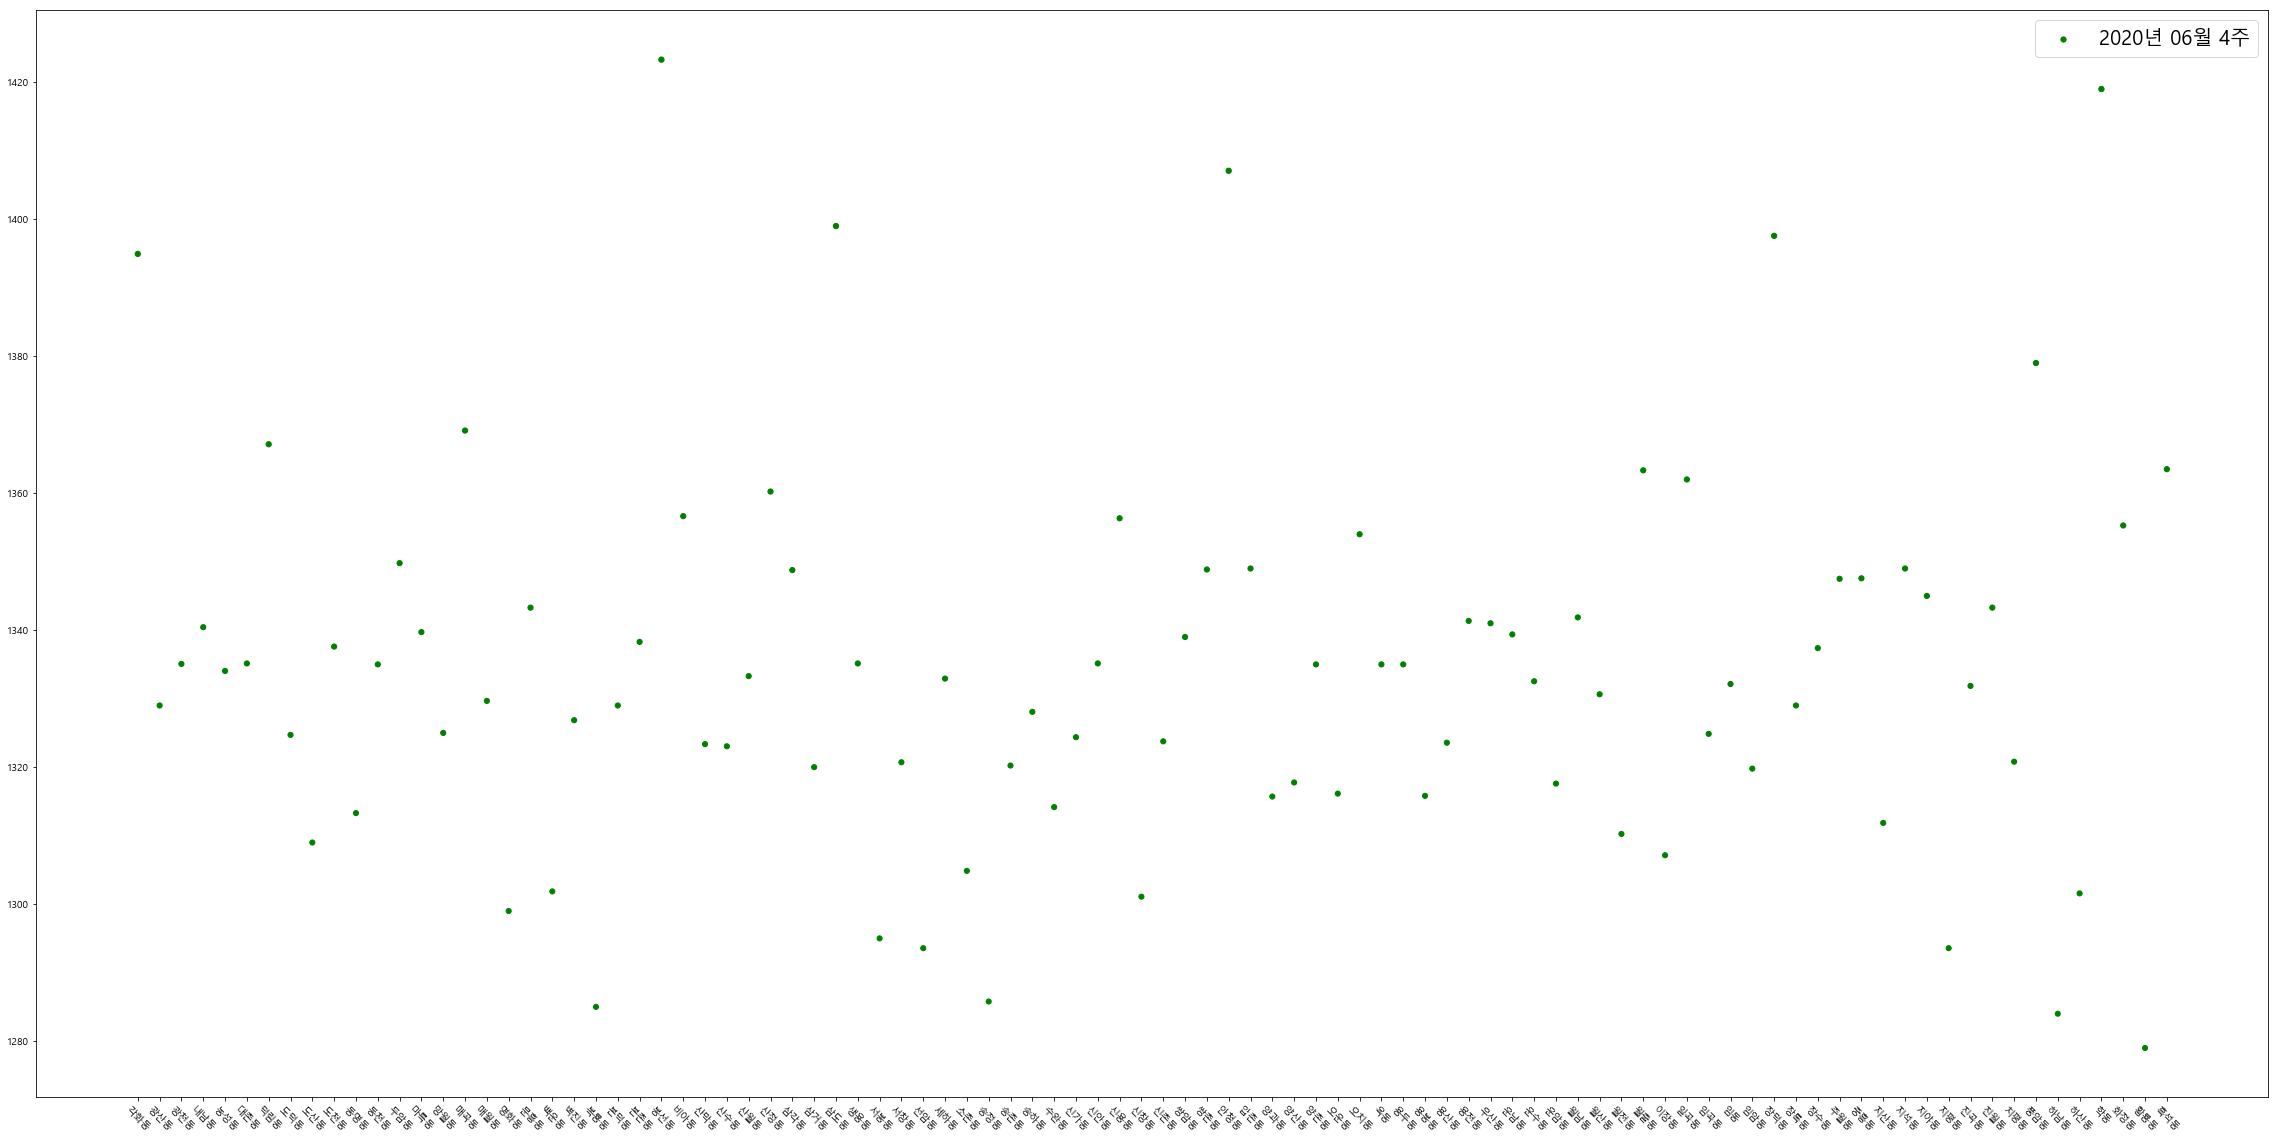

In [89]:
plt.figure(figsize = (40,20))
plt.scatter(df3['동'], df3[Y_M_W], c = 'g', s = df3[Y_M_W]/50)
plt.legend(fontsize = 20)
plt.xticks(rotation = - 45 )
plt.show()

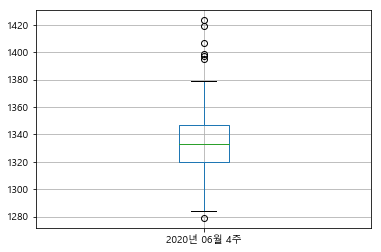

In [90]:
df3.boxplot(column=Y_M_W)

In [91]:
df3[Y_M_W].describe()

count      94.000000
mean     1334.492889
std        27.633364
min      1279.000000
25%      1319.838750
50%      1333.110000
75%      1346.875000
max      1423.290000
Name: 2020년 06월 4주, dtype: float64

In [92]:
df3[Y_M_W].quantile()
Q1 = df3[Y_M_W].quantile(q = 0.25)
Q3 = df3[Y_M_W].quantile(q = 0.75)

IQR = Q3 - Q1
df_IQR = df3[Y_M_W] > Q1 - IQR * 1.5

In [93]:
i = 0

while i<len(df_IQR):
    
    if df_IQR[i]==0:
        print('{}에서 하한치보다 낮은 평균 가격 {}원이 발견되었습니다.'.format(df3.loc[i,'동'], df3.loc[i,Y_M_W]))
        i+=1
    
    else:
        i+=1     

황룡동에서 하한치보다 낮은 평균 가격 1279.0원이 발견되었습니다.


In [82]:
# 가짜석유 크롤링

In [95]:
import requests 
from urllib.request import urlopen
from bs4 import BeautifulSoup # HTTP Response -> HTML 

import pandas as pd
from datetime import datetime
import time 
import re

In [96]:
query = '광주가짜석유'
url = "https://search.naver.com/search.naver?where=news&query=" + query

In [97]:
import requests 
web = requests.get(url).content

In [98]:
web = requests.get(url).content
source = BeautifulSoup(web, 'html.parser')

In [99]:
Y_M_W = str(Y_M_W).replace("년","")
Y_M_W = str(Y_M_W).replace("월","")
Y_M_W = str(Y_M_W).replace("주","")
Y_M_W = str(Y_M_W).replace(" ",".")

if Y_M_W[-1] == '1':
    start_date = Y_M_W[:8]+"01"
    end_date = Y_M_W[:8]+"07"

elif Y_M_W[-1] == '2':
    start_date = Y_M_W[:8]+"08"
    end_date = Y_M_W[:8]+"14"
        
elif Y_M_W[-1] == '3':
    start_date = Y_M_W[:8]+"15"
    end_date = Y_M_W[:8]+"21"
        
elif Y_M_W[-1] == '4':
    start_date = Y_M_W[:8]+"22"
    end_date = Y_M_W[:8]+"28"
        
else:
    start_date = Y_M_W[:8]+"29"
    end_date = Y_M_W[:8]+"31"

In [100]:
max_page = 5
titles = []
dates = []
articles = []
article_urls = []
press_companies = []

current_call = 1
last_call = (max_page - 1) * 10 + 1
sort_type = 1

while current_call <= last_call:
    
    print('\n{}번째 기사글부터 크롤링을 시작합니다.'.format(current_call))
    
    url = "https://search.naver.com/search.naver?where=news&query=" + query \
          + "&sort=" + str(sort_type) \
          + "&start=" + str(current_call)

    web = requests.get(url).content
    source = BeautifulSoup(web, 'html.parser')

    urls_list = []
    for urls in source.find_all('a', {'class' : "info"}):
        if urls["href"].startswith("https://news.naver.com"):
            urls_list.append(urls["href"])

    for url in urls_list:
        try:
            headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
            web_news = requests.get(url, headers=headers).content
            source_news = BeautifulSoup(web_news, 'html.parser')

            title = source_news.find('h3', {'id' : 'articleTitle'}).get_text()
            print('Processing article : {}'.format(title))

            date = source_news.find('span', {'class' : 't11'}).get_text()

            article = source_news.find('div', {'id' : 'articleBodyContents'}).get_text()
            article = article.replace("\n", "")
            article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
            article = article.replace("동영상 뉴스       ", "")
            article = article.replace("동영상 뉴스", "")
            article = article.strip()

            press_company = source_news.find('address', {'class' : 'address_cp'}).find('a').get_text()
            
            titles.append(title)
            dates.append(date)
            articles.append(article)
            press_companies.append(press_company)
            article_urls.append(url)
        except:
            print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))
            
    # 대량의 데이터를 대상으로 크롤링을 할 때에는 요청 사이에 쉬어주는 타이밍을 넣는 것이 좋습니다.
    time.sleep(5)
    current_call += 10

    
# 각 데이터 종류별 list에 담아둔 전체 데이터를 DataFrame에 모으고 엑셀 파일로 저장합니다.
# 파일명을 result_연도월일_시분.csv 로 지정합니다.
article_df = pd.DataFrame({'Title':titles, 
                           'Date':dates, 
                           'Article':articles, 
                           'URL':article_urls, 
                           'PressCompany':press_companies})

article_df.to_excel('result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M')), index=False, encoding='utf-8')
article_df.head()


1번째 기사글부터 크롤링을 시작합니다.
Processing article : '가짜 경유 파동' 광주·전남은 안전할까

11번째 기사글부터 크롤링을 시작합니다.
Processing article : '안딩크', '형사지존' 별명 부자 안재경 형사과장의 30년 경찰생활
Processing article : 명품 하나 없는 명품 수선공 “자식도 모르게 전재산 기부”
Processing article : 5·18 양심선언 軍수사관의 고통…"5월은 인고의 시간"

21번째 기사글부터 크롤링을 시작합니다.

31번째 기사글부터 크롤링을 시작합니다.
Processing article : [전문] 유성엽 "文정부 경제 최악…일각서 '포기했다'고 해"
Processing article : [전문]제376회국회(임시회) 유성엽 민주통합의원모임 원내대표 교섭단체대표연설문
Processing article : 유성엽 민주통합의원모임 원내대표 "코로나 추경,  공공부문 3·3 개혁해야"

41번째 기사글부터 크롤링을 시작합니다.
Processing article : [전문]유성엽 "팬덤 정치, 도 지나쳐…분권형 개헌해야"
Processing article : [전문] 유성엽 “文정부, 이명박·박근혜 ‘망쳐놓은 경제’ 더 망쳐”
Processing article : [전국 주요 신문 톱뉴스](5일 조간)


,Title,Date,Article,URL,PressCompany
0,'가짜 경유 파동' 광주·전남은 안전할까,2020.11.05. 오후 3:31,최근 5년간 유류 '부정 유통' 주유소 전국 2770곳차량 경유에 값싼 기름 섞어 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,뉴시스
1,"'안딩크', '형사지존' 별명 부자 안재경 형사과장의 30년 경찰생활",2020.07.28. 오후 7:40,안재경 전 대구 수성경찰서 형사과장안재경 전 대구 수성경찰서 형사과장이 30여년 간...,https://news.naver.com/main/read.nhn?mode=LSD&...,한국일보
2,명품 하나 없는 명품 수선공 “자식도 모르게 전재산 기부”,2020.06.13. 오전 3:04,[김미리 기자의 1미리]전남대에 12억원 기부한 김병양 명동스타사 회장짝퉁 루이비통...,https://news.naver.com/main/read.nhn?mode=LSD&...,조선일보
3,"5·18 양심선언 軍수사관의 고통…""5월은 인고의 시간""",2020.05.17. 오전 8:01,"'505 보안부대' 수사관 허장환 인터뷰1988년 ""전두환 광주 왔다"" 양심선언작년...",https://news.naver.com/main/read.nhn?mode=LSD&...,뉴시스
4,"[전문] 유성엽 ""文정부 경제 최악…일각서 '포기했다'고 해""",2020.02.20. 오전 11:35,민주통합 의원모임 원내대표 교섭단체 대표연설유성엽 민주통합 의원모임 원내대표가 20...,https://news.naver.com/main/read.nhn?mode=LSD&...,데일리안


In [101]:
# 크롤링 데이터 분석
from konlpy.tag import Twitter
# 엑셀 데이터 불러오고 타이틀 하나의 str로 묶기
Articles = article_df['Article'].tolist()
Articles = ' '.join(Articles)
Articles[:1000]
# 품사별로 분류
twitter = Twitter()
raw_pos_tagged = twitter.pos(Articles, norm=True, stem=True) # POS Tagging
raw_pos_tagged
# 무의미한 품사 정리
del_list = ['하다','없다','만들다','그러나','여러분','되어다','보다','모두', '고르다', '미치다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다', '11']
word_cleaned = []
for word in raw_pos_tagged:
    if word[1] not in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
            word_cleaned.append(word[0])
from collections import Counter
result = Counter(word_cleaned)
word_dic = dict(result)
# 키워드들의 밸류값에 횟수 넣기
sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
# 하나의 딕트로 변경
word_frequency = nltk.FreqDist(word_cleaned) # Frequency Distribution
# 딕트로 데이터 프레임 생성
article_df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys())
result = article_df.sort_values([0], ascending=False)
# 상위 16개 선정
result = result[:16]

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


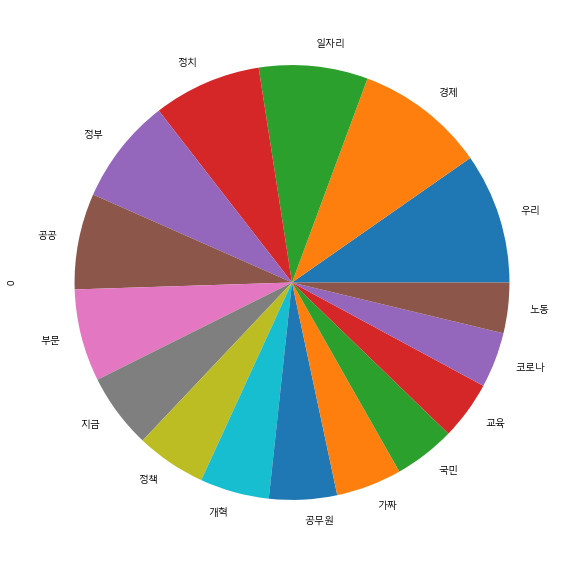

In [102]:
result.plot(kind='pie', subplots=True, legend=False, figsize=(10,10))
plt.show()

In [103]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import datetime

In [104]:
from selenium.webdriver.chrome.options import Options
options = Options()
options.binary_location = "C:\\Program Files\\Google\\Chrome\\Application\\chrome.exe" # 실제 크롬 브라우저 설치 경로
# options.binary_location = "C:\\Program Files (x86)\\Google\\Chrome\\Application\\chrome.exe" # 실제 크롬 브라우저 설치 경로
driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe', chrome_options=options)
driver.get('https://finance.naver.com/marketindex/oilDetail.nhn?marketindexCd=OIL_GSL')
driver.current_url

'https://finance.naver.com/marketindex/oilDetail.nhn?marketindexCd=OIL_GSL'

In [105]:
driver.execute_script("showChart('month3');")
# 3개월의 경우 month3, 1개월의 경우 month 등으로 조정 가능
# 1년의 경우 year, 3년의 경우 year3, 10년의 경우 year10

In [106]:
from PIL import Image
import requests
from io import BytesIO

today = datetime.datetime.now()
today = today.strftime('%Y-%m-%d')
today = str(today).replace("-","")
z = "https://ssl.pstatic.net/imgfinance/chart/marketindex/area/month3/OIL_GSL.png?sidcode="
url = z+today

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.show()
#이 코드로 이미지를 여는 것은 충분히 가능하나
#하루가 지나갈때마다 이미지가 바뀌고
#csv 파일로 여는 방식이 아니다보니
#matplotlib,seaborn,pandas,dataframe의 활용이 불가능하며
#네이버에서 이미지를 받아다가
#이미지만 열어주는 방식임으로
#유가(휘발유)데이터 (데이터 분류에 따른 데이터 시각화 작업)가 이미 되어있는
#이미지를 불러오는 방식이므로
#(특히, 숫자로는 최고가,최저가만 기재되어 있다는 점이 단점)
#복습하고자 하는 목적에 부합하지 않음.
#다른 코드로 활용할 것을 권장
#'python show image by url'를 검색했을때 나오는 코드인지라 아직 배우지 않은 부분이 포함되어 있음..
# 반드시 위 코드를 실행시킬것!!
#showchart 부분과  /area/다음에 나와있는 부분을 서로 일치시킬것!!!!

In [107]:
driver.close()
driver.quit()